**Task: Sentiment Analysis Using Naive Bayes Classifier**

**Objective**

Classify the sentiment of tweets related to COVID-19 as either Positive, Neutral, Negative, Extremely Positive, or Extremely Negative using the Naive Bayes model.

In [1]:
'''
pip install pandas
pip install matplotlib
pip install scikit-learn
pip install seaborn
pip install --user -U nltk
pip install -U imbalanced-learn
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import nltk     #pip install --user -U nltk
from nltk.stem import WordNetLemmatizer
                #pip install -U imbalanced-learn
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re



**Preprocessing**

- **Data Cleaning**: Describe the steps taken to clean the tweet data, including removal of URLs, special characters, and stop words.
- **Text Vectorization**: Explain the vectorization method used, such as TF-IDF or Count Vectorizer, to convert the text into numerical format.


In [3]:
df = pd.read_csv('covidtweets_final.csv') 
df.info()
#df is non-edited covidtweets_final.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41155 entries, 0 to 41154
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41155 non-null  int64 
 1   ScreenName     41155 non-null  int64 
 2   Location       32565 non-null  object
 3   TweetAt        41155 non-null  object
 4   OriginalTweet  41155 non-null  object
 5   Sentiment      41155 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


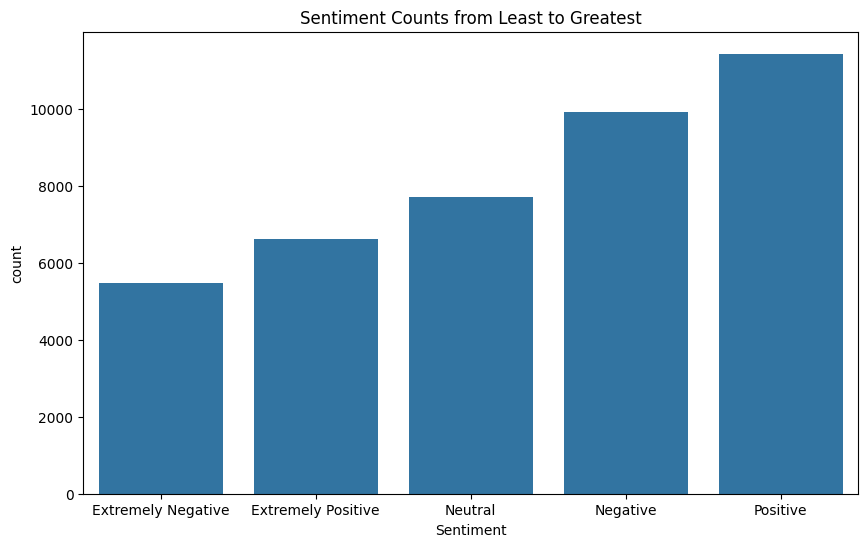

In [4]:
# Select columns, drop na rows
df = df[['OriginalTweet', 'Sentiment']].dropna()

# Order of graph elements, count
sentiment_counts = df['Sentiment'].value_counts(ascending=True)
df['Sentiment'] = pd.Categorical(df['Sentiment'], categories=sentiment_counts.index, ordered=True)

# Plot the count plot with sorted order
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index)
plt.title("Sentiment Counts from Least to Greatest")
plt.show()

Sentiment Mapping: {'Extremely Negative': np.int64(0), 'Extremely Positive': np.int64(1), 'Negative': np.int64(2), 'Neutral': np.int64(3), 'Positive': np.int64(4)}


/tmp/ipykernel_3132/410509247.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment_encoded', data=df, palette='Dark2')


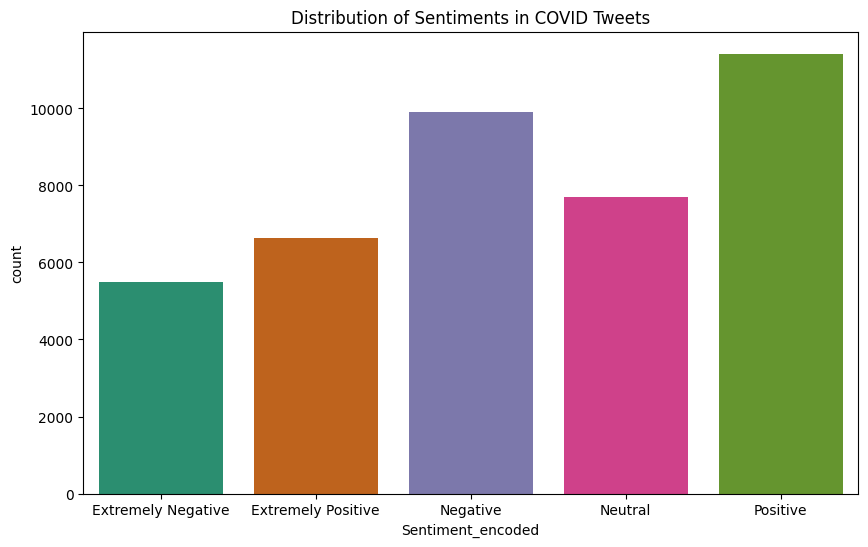

In [5]:
df= df[['OriginalTweet', 'Sentiment']].dropna()

label_encoder = LabelEncoder()
df['Sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

sentiment_vals = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Sentiment Mapping:", sentiment_vals)

plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment_encoded', data=df, palette='Dark2')
plt.title("Distribution of Sentiments in COVID Tweets")

plt.xticks(ticks=list(sentiment_vals.values()), labels=list(sentiment_vals.keys()))
plt.show()


**Model Training and Evaluation**

- **Model Training**: Train a Naive Bayes Classifier on the processed tweet data. Optionally, perform hyperparameter tuning to optimize the model.
- **Evaluation Metrics**: Report the evaluation metrics for the Naive Bayes model, including accuracy, precision, recall, and F1-score.

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy: 0.7474
Precision: 0.7751
Recall: 0.7474
F1 Score: 0.7474


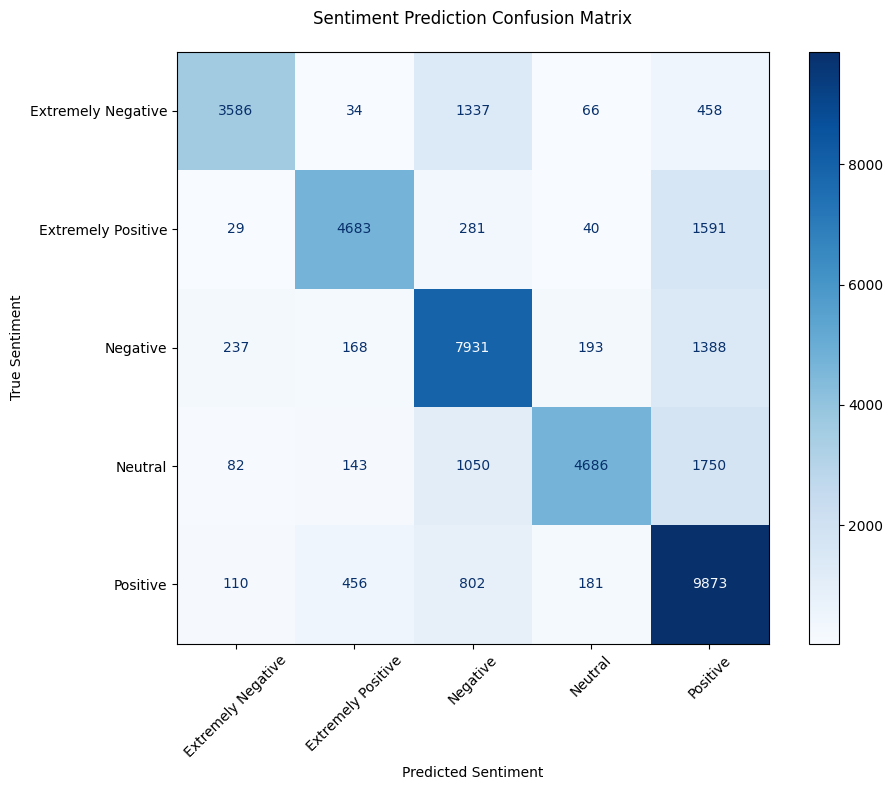

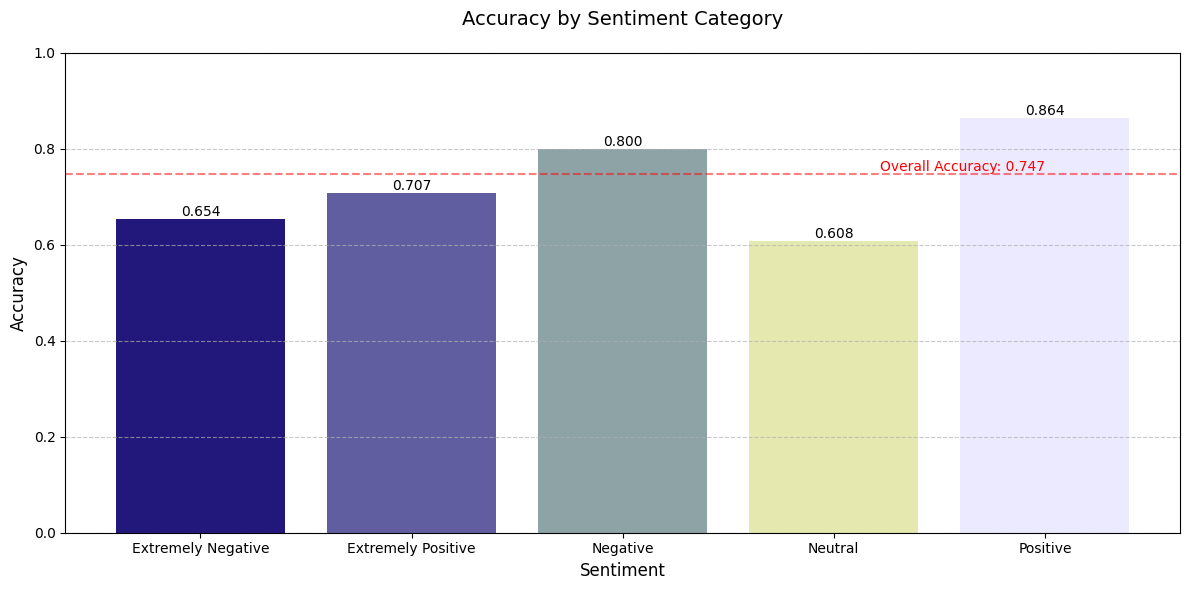


Detailed Metrics by Sentiment:
----------------------------

Sentiment: Extremely Negative
Total samples: 5481
Correctly predicted: 3586
Accuracy: 0.654

Sentiment: Extremely Positive
Total samples: 6624
Correctly predicted: 4683
Accuracy: 0.707

Sentiment: Negative
Total samples: 9917
Correctly predicted: 7930
Accuracy: 0.800

Sentiment: Neutral
Total samples: 7711
Correctly predicted: 4686
Accuracy: 0.608

Sentiment: Positive
Total samples: 11422
Correctly predicted: 9873
Accuracy: 0.864


In [ ]:
def vectorize_data(df, column_name):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df[column_name])
    return X, vectorizer


def train_naive_bayes_classifier(X, y, alpha=1.0):
    classifier = MultinomialNB(alpha=alpha)  # alpha is the smoothing parameter
    classifier.fit(X, y)
    return classifier

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

def plot_sentiment_accuracy(y_true, y_pred):
    from sklearn.metrics import accuracy_score
    
    # Calculate sentiment accuracy using dictionary comprehension
    sentiment_accuracy = {
        sentiment: np.mean(y_pred[y_true == sentiment] == sentiment)
        for sentiment in np.unique(y_true)
    }

    # Visualization
    plt.figure(figsize=(12, 6))
    bars = plt.bar(sentiment_accuracy.keys(), sentiment_accuracy.values(), color=['#22177A', '#605EA1', '#8EA3A6', '#E6E9AF', '#EBEAFF'])

    plt.title('Accuracy by Sentiment Category', pad=20, size=14)
    plt.xlabel('Sentiment', size=12)
    plt.ylabel('Accuracy', size=12)
    plt.ylim(0, 1.0)

    # Add value labels on top of bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}', ha='center', va='bottom')

    # Overall accuracy and grid
    overall_accuracy = accuracy_score(y_true, y_pred)
    plt.axhline(y=overall_accuracy, color='r', linestyle='--', alpha=0.5)
    plt.text(len(sentiment_accuracy) - 1, overall_accuracy, f'Overall Accuracy: {overall_accuracy:.3f}', ha='right', va='bottom', color='r')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
    
    # Print detailed metrics
    print("\nDetailed Metrics by Sentiment:")
    print("----------------------------")
    for sentiment, accuracy in sentiment_accuracy.items():
        total = (y_true == sentiment).sum()
        correct = int(accuracy * total)
        print(f"\nSentiment: {sentiment}")
        print(f"Total samples: {total}")
        print(f"Correctly predicted: {correct}")
        print(f"Accuracy: {accuracy:.3f}")

def plot_confusion_matrix(y_true, y_pred):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(10, 8))
    ConfusionMatrixDisplay(cm, display_labels=labels).plot(
        cmap='Blues', values_format='d', xticks_rotation=45, ax=plt.gca()
    )

    plt.title('Sentiment Prediction Confusion Matrix', pad=20)
    plt.xlabel('Predicted Sentiment')
    plt.ylabel('True Sentiment')
    plt.tight_layout()
    plt.show()

def main(df):
    #data preperation
    X, vectorizer = vectorize_data(df, 'OriginalTweet')
    y = df['Sentiment']
    
    classifier = train_naive_bayes_classifier(X, y, alpha=1)
    y_pred = classifier.predict(X)
    # Trains  MultinomialNB classifier data

    # Evaluate / visualize
    evaluate_model(y, y_pred)
    plot_confusion_matrix(y, y_pred)
    plot_sentiment_accuracy(y, y_pred)
    
    return classifier, vectorizer

classifier, vectorizer = main(df)